<a href="https://colab.research.google.com/github/FatemehMomeni/AdvDM_pro4/blob/main/DM_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount google drive**

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Read dataset**

In [ ]:
import pandas as pd

dataset = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/ds.csv")

In [ ]:
# Set width and height to show datasets completely
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 13620)

**Columns information**

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13598 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

**Check existence of missing values**

In [ ]:
print(dataset.isnull().sum())

Area                0
Perimeter          13
MajorAxisLength     0
MinorAxisLength     0
AspectRation        0
Eccentricity        0
ConvexArea          0
EquivDiameter       0
Extent              0
Solidity            0
roundness           0
Compactness         0
ShapeFactor1        0
ShapeFactor2        0
ShapeFactor3        0
ShapeFactor4        0
Class               0
dtype: int64


**Check and remove outliers**

In [ ]:
import numpy as np

columns = [c for c in dataset.columns if c!='Class']
for c in columns:
  sort_dataset = dataset.sort_values(by=[c], ascending=True)
  q1 = np.quantile(sort_dataset[c], 0.25)
  q3 = np.quantile(sort_dataset[c], 0.75)
  IQR = q3 - q1
  lower_fence = q1 - (1.5 * IQR)
  upper_fence = q3 + (1.5 * IQR)

  for row in range(len(sort_dataset)):
      if sort_dataset.loc[row,c] < lower_fence or sort_dataset.loc[row,c] > upper_fence:
          sort_dataset.drop(axis=0, index=row, inplace=True)
  sort_dataset.reset_index(inplace=True)

no_outlier = sort_dataset.drop(axis=1, columns=['index', 'Class'])

print(no_outlier.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             12844 non-null  int64  
 1   Perimeter        12833 non-null  float64
 2   MajorAxisLength  12844 non-null  float64
 3   MinorAxisLength  12844 non-null  float64
 4   AspectRation     12844 non-null  float64
 5   Eccentricity     12844 non-null  float64
 6   ConvexArea       12844 non-null  int64  
 7   EquivDiameter    12844 non-null  float64
 8   Extent           12844 non-null  float64
 9   Solidity         12844 non-null  float64
 10  roundness        12844 non-null  float64
 11  Compactness      12844 non-null  float64
 12  ShapeFactor1     12844 non-null  float64
 13  ShapeFactor2     12844 non-null  float64
 14  ShapeFactor3     12844 non-null  float64
 15  ShapeFactor4     12844 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 1.6 MB
None


**Fill missing values**

In [ ]:
no_outlier['Perimeter'].fillna(value=no_outlier['Perimeter'].mean(), inplace=True)
print(no_outlier.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64


**Correlation matrix**

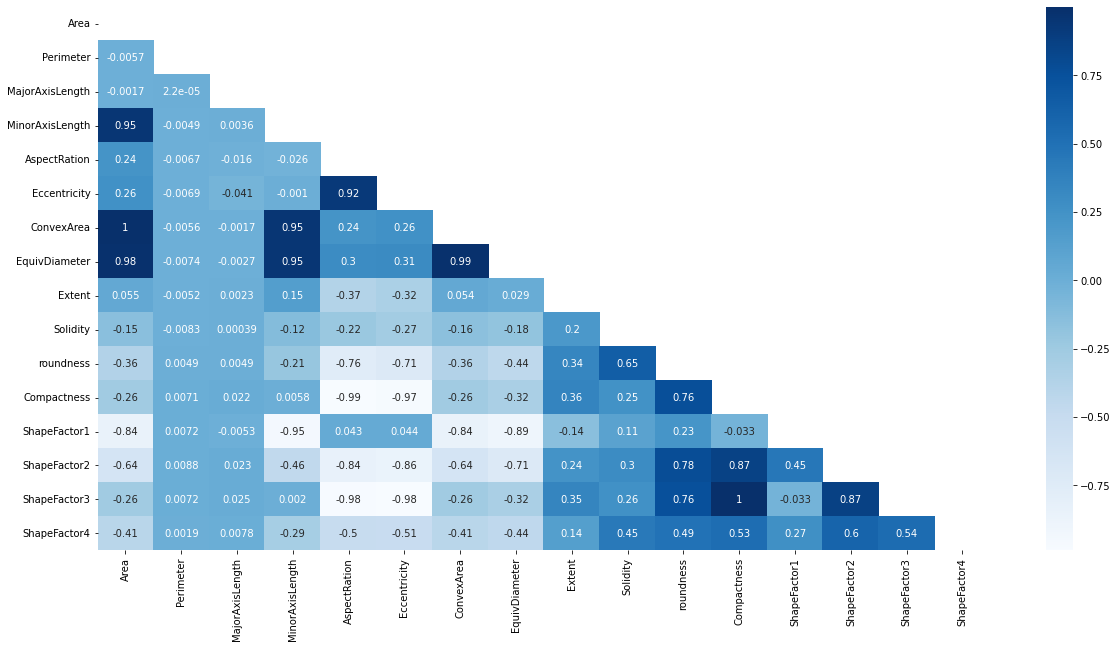

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation = no_outlier.corr()
matrix = np.triu(correlation)  # Getting bottom triangle of correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True, mask=matrix, cmap='Blues')
plt.show()

**Delete columns**

In [ ]:
reduced = no_outlier.drop(axis=1, columns=['ConvexArea','ShapeFactor3','MinorAxisLength'])
print(reduced.columns)

Index(['Area', 'Perimeter', 'MajorAxisLength', 'AspectRation', 'Eccentricity', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor4'], dtype='object')


**Normalization**

In [ ]:
processed = (reduced - reduced.min())/(reduced.max()-reduced.min())
print(processed.head())

       Area  Perimeter  MajorAxisLength  AspectRation  Eccentricity  EquivDiameter    Extent  Solidity  roundness  Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor4
0  0.394936   0.999923         0.000318      0.618966      0.910420       0.391991  0.478733  0.617062   0.649835     0.234533      0.359657      0.109835      0.000000
1  0.424724   0.999928         0.000319      0.505773      0.864154       0.432360  0.442359  0.603282   0.648053     0.327857      0.295273      0.135599      0.000043
2  0.475384   0.999936         0.000337      0.520795      0.871139       0.496859  0.645368  0.658919   0.662582     0.314751      0.251801      0.106640      0.000377
3  0.392444   0.999923         0.000312      0.552752      0.885067       0.388521  0.627095  0.645608   0.629739     0.287636      0.344797      0.134941      0.000798
4  0.278149   0.999899         0.000264      0.529577      0.875089       0.208494  0.445316  0.656969   0.679654     0.307229      0.544933      0.243076 

**Discretization**

In [ ]:
for c in processed.columns:
  processed[c] = pd.cut(processed[c], bins=13, labels=[str(d) for d in range(1,14)], right=False)

print(processed.head())

  Area Perimeter MajorAxisLength AspectRation Eccentricity EquivDiameter Extent Solidity roundness Compactness ShapeFactor1 ShapeFactor2 ShapeFactor4
0    6        13               1            9           12             6      7        9         9           4            5            2            1
1    6        13               1            7           12             6      6        8         9           5            4            2            1
2    7        13               1            7           12             7      9        9         9           5            4            2            1
3    6        13               1            8           12             6      9        9         9           4            5            2            1
4    4        13               1            7           12             3      6        9         9           4            8            4            1


**Define a function to print results**

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

def output(model):
  #correspond_label(model)
  ARI = adjusted_rand_score(sort_dataset['Class'], model) # [0,1]
  AMI = adjusted_mutual_info_score(sort_dataset['Class'], model) #(,1]
  S = silhouette_score(processed, model) #[-1,1]
  print('\nAdjusted Rand Score: ', ARI, '\nAdjusted Mutual Info Score: ', AMI,'\nSilhouette Score: ', S)
  print('\n')

**Models**

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# K-Means
print("K-Means:")
kmeans = KMeans(n_clusters=7, n_init=20, max_iter=500).fit(processed)
output(kmeans.labels_)

# Agglomerative
print("Agglomerative:")
agglomerative = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward').fit(processed)
output(agglomerative.labels_)

# DBSCAN
print("DBSCAN:")
dbscan = DBSCAN(eps=2, min_samples=4, metric='euclidean').fit(processed)
output(dbscan.labels_)

K-Means:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,



Adjusted Rand Score:  0.5952913086985757 
Adjusted Mutual Info Score:  0.6627819783274088 
Silhouette Score:  0.24805996931554916


Agglomerative:


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,



Adjusted Rand Score:  0.5420894382515066 
Adjusted Mutual Info Score:  0.6268897708724146 
Silhouette Score:  0.23718568297363132


DBSCAN:


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,



Adjusted Rand Score:  0.03502425272851427 
Adjusted Mutual Info Score:  0.1398005345723374 
Silhouette Score:  0.03699411492544787




In [ ]:
len(np.unique(dbscan.labels_))

7

**PCA**

In [ ]:
from sklearn.decomposition import PCA

reduced = processed.copy()
pca = PCA(n_components=2)
pca_df = pca.fit_transform(reduced)
pca_df = pd.DataFrame(pca_df, columns=['PCA1','PCA2'])
pca_df.insert(loc=len(pca_df.columns), column="Class", value=list(sort_dataset['Class']))
pca_df.head()

,PCA1,PCA2,Class
0,-9.787037,2.354862,CALI
1,-8.933264,3.494023,CALI
2,-8.793871,5.182868,CALI
3,-9.129777,3.243671,CALI
4,-6.916227,-1.348173,SIRA


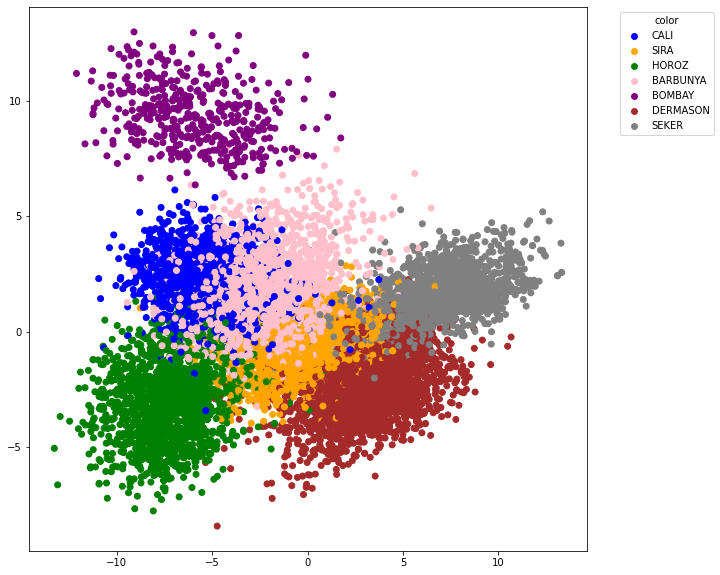

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(10, 10))
colors = {'CALI':'blue', 'SIRA':'orange', 'HOROZ':'green', 'BARBUNYA':'pink', 'BOMBAY':'purple', 'DERMASON':'brown', 'SEKER':'gray'}
ax.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Class'].map(colors))
# add legend
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
ax.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

**Find index of each class**

In [ ]:
labels = sort_dataset.copy()
classes = dict()
for r in range(len(labels)):  
  if labels.loc[r,'Class'] not in classes.keys():
    classes[labels.loc[r,'Class']] = r

**Define a function to find corresond label of each class**

In [ ]:
def correspond_label(model):
  for k,v in classes.items():
    l = model[v]
    labels['Class'].replace({k: l}, inplace=True)